In [45]:
'''
II2202 TIVNM HT20-2 Research Methodology and Scientific Writing
Dr. Henrik's DASx Group 5
Project Code
Low-dimensional data
Authors: Bazil Muzaffar Kotriwala, Tamas Laczik
'''

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

# GAM Libraries
from pygam import LinearGAM, s, f

# Interpret ML Libraries
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
from interpret.data import Marginal
from interpret.perf import RegressionPerf

In [46]:
# Read data
df = pd.read_csv("BostonHousingData.csv")
display(df.head(3))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


### Exploring the Data

In [47]:
def check_data_dimensionality(df):
    if df.shape[1] > 25:
        print('Data Dimensionality: High')
    else:
        print('Data Dimensionality: Low')

In [48]:
print('No of observations:', df.shape[0])
print('No of features:', df.shape[1])
check_data_dimensionality(df)

No of observations: 506
No of features: 14
Data Dimensionality: Low


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [50]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
# Check for null values
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


### Visualizing the data

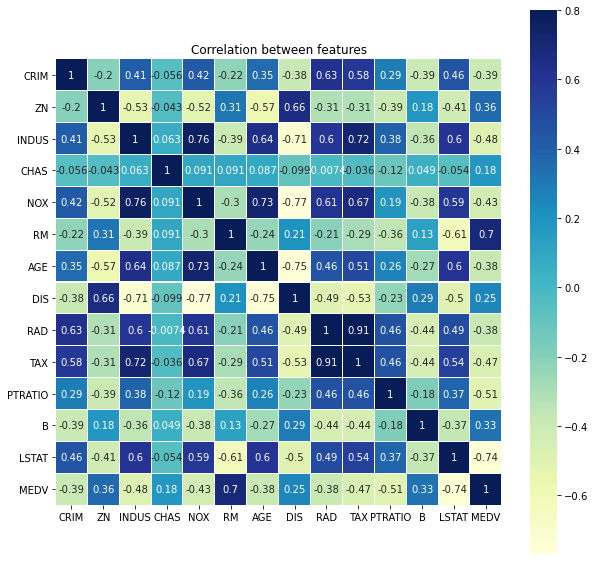

In [52]:
corr=df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

C:\ProgramData\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda\lib\site-packages\pandas\plotting\_matplotli

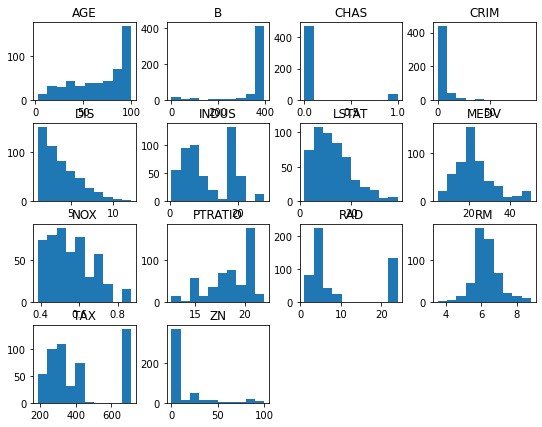

In [53]:
df.hist(bins=10,figsize=(9,7),grid=False);

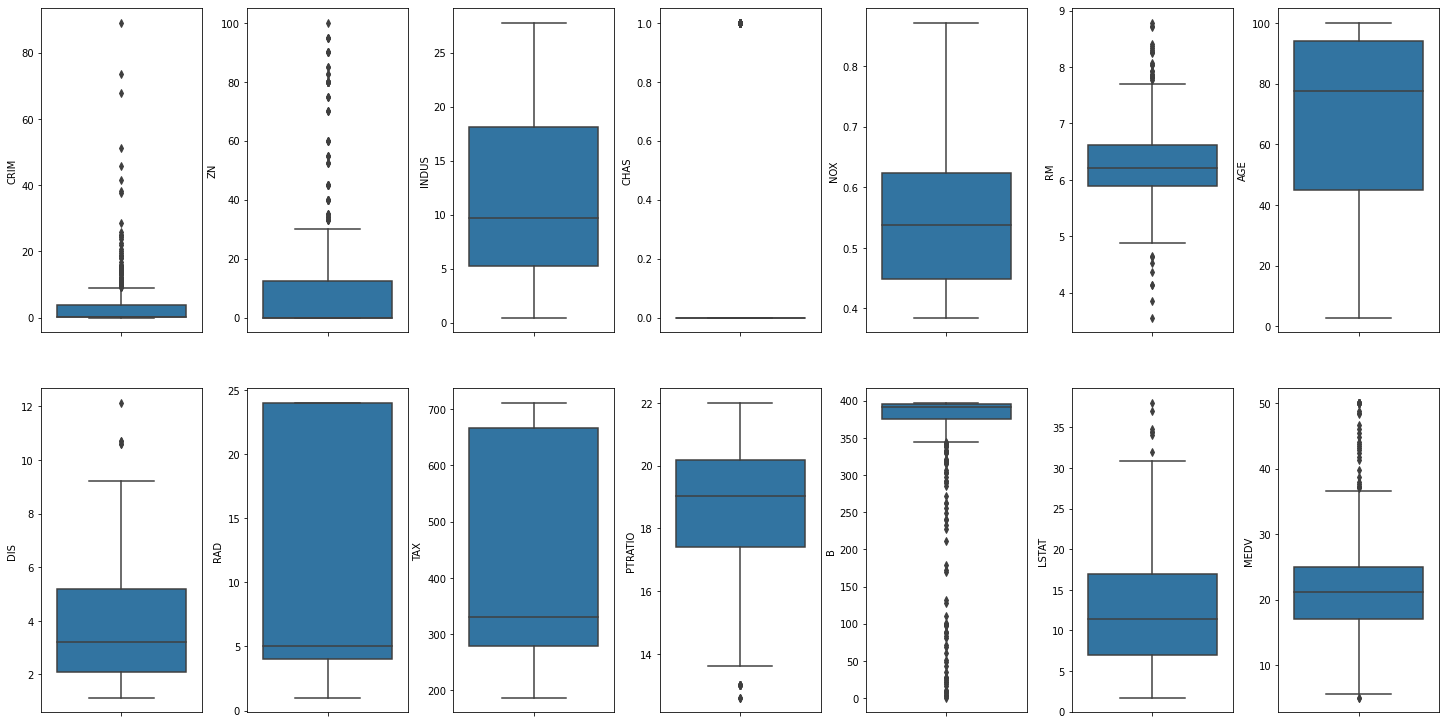

In [54]:
# Visualize outliers
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

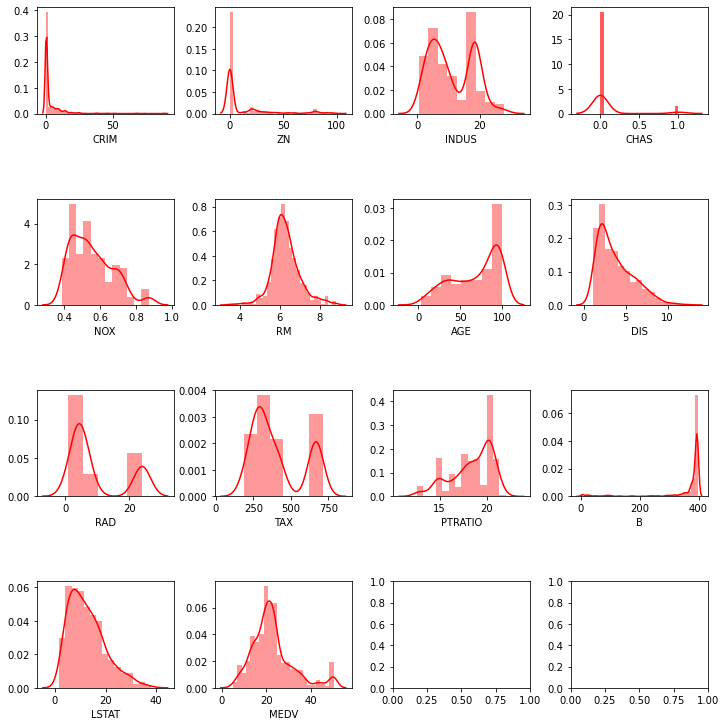

In [55]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    try:
        sns.distplot(v, ax=axs[index], color='r')
    except:
        sns.distplot(v, ax=axs[index], kde_kws={'bw': 0.1}, color='r')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

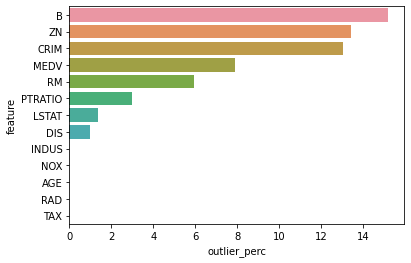

In [56]:
L = []
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    L.append((k, perc))

outlier_df = pd.DataFrame(L, columns=['feature', 'outlier_perc']).sort_values('outlier_perc', ascending=False)[1:]
ax = sns.barplot(x="outlier_perc", y="feature", data=outlier_df)

## Building a Linear GAM

In [21]:
# Prepare the data
X = df.drop(['MEDV'], axis=1).values
y = df['MEDV']

lams = np.random.rand(100, 13)
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)
gam = LinearGAM(n_splines=10).gridsearch(X, y, lam=lams)

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

(100, 13)


100% (100 of 100) |######################| Elapsed Time: 0:00:22 Time:  0:00:22


In [22]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     43.3374
Link Function:                     IdentityLink Log Likelihood:                                  -1722.305
Number of Samples:                          506 AIC:                                             3533.2847
                                                AICc:                                            3542.0119
                                                GCV:                                                13.614
                                                Scale:                                             11.5327
                                                Pseudo R-Squared:                                   0.8751
Feature Function                  Lam

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

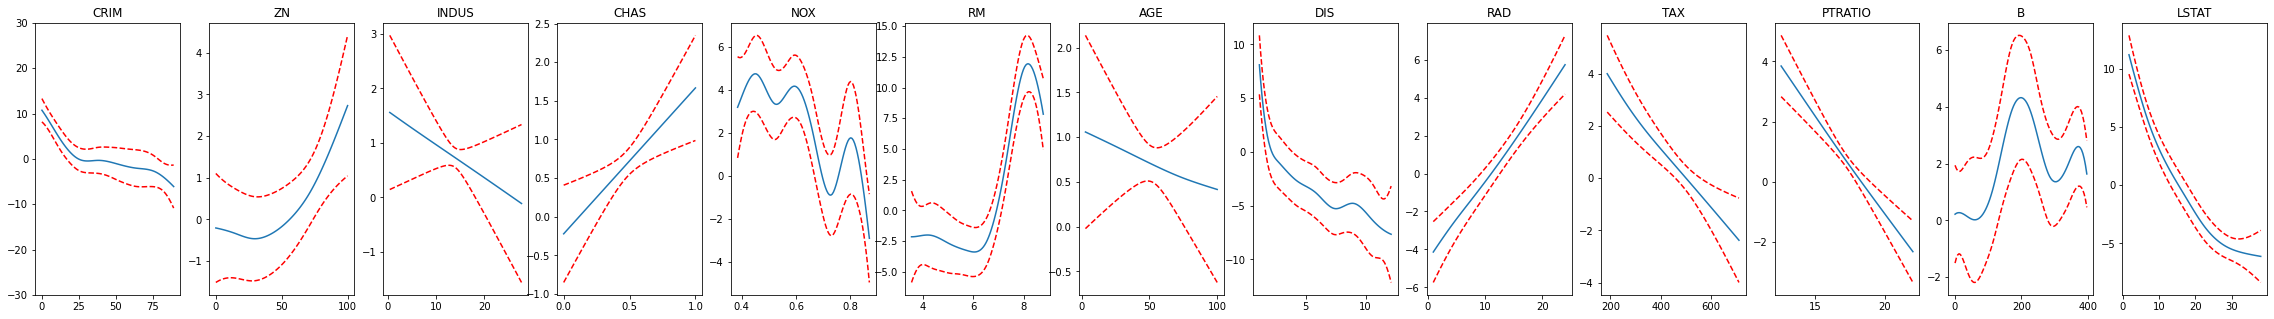

In [23]:
titles = df.columns[0:13]
plt.figure()
fig, axs = plt.subplots(1,13,figsize=(40, 5))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

In [139]:
# Prepare the data
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

# Split the data into train and test data:
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

# Train the model
ebr = ExplainableBoostingRegressor()
ebr.fit(X_train, Y_train)

ExplainableBoostingRegressor(binning='quantile', early_stopping_rounds=50,
                             early_stopping_tolerance=0.0001,
                             feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                            'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                            'TAX', 'PTRATIO', 'B', 'LSTAT'],
                             feature_types=['continuous', 'continuous',
                                            'continuous', 'categorical',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous'],
                             inner_bags=0, interactions=0, learning_rate=0.01,
                             mains='all', max_bins=255, max_in

In [361]:
# Generate local explanations
ebr_local = ebr.explain_local(X_test, Y_test)

def get_feature_local_explanations(ebr_local, X_test):
    L = []
    L_JSON = []
    for i in range(len(X_test)):
        
        # List
        feature_names = ebr_local.data(i)['names']
        local_scores = ebr_local.data(i)['scores']
        intercept = ebr_local.data(i)['extra']['scores'][0]
        actual_score = ebr_local.data(i)['perf']['actual']
        predicted_score = ebr_local.data(i)['perf']['predicted']
        difference = abs(actual_score - predicted_score)
        L.append([feature_names, local_scores, intercept, actual_score, predicted_score, difference])
        
        # json
        j = {}
        j['feature_names'] = feature_names
        j['local_scores'] = local_scores
        j['intercept'] = intercept
        j['actual_score'] = actual_score
        j['predicted_score'] = predicted_score
        j['difference'] = difference
    
        L_JSON.append(j)
        
    return L, L_JSON
    
L, L_JSON = get_feature_local_explanations(ebr_local, X_test)
print(L[0:1])
print(L_JSON[0:1])

[[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], [-0.20076842876226486, 0.4298923641433796, 1.2885642913375792, -0.12943709913599677, 0.5715203124951305, 2.0775180926814576, 0.07898608575629895, 0.29827418259669547, 0.5648892122896936, 1.9029509240971385, -0.08193579304626031, -0.5124347367412085, 1.52462456878356], 22.527770319002627, 28.2, 30.34041429549783, 2.1404142954978305]]
[{'feature_names': ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], 'local_scores': [-0.20076842876226486, 0.4298923641433796, 1.2885642913375792, -0.12943709913599677, 0.5715203124951305, 2.0775180926814576, 0.07898608575629895, 0.29827418259669547, 0.5648892122896936, 1.9029509240971385, -0.08193579304626031, -0.5124347367412085, 1.52462456878356], 'intercept': 22.527770319002627, 'actual_score': 28.2, 'predicted_score': 30.34041429549783, 'difference': 2.1404142954978305}]


### Visualize GAM Local explanation

In [364]:
import json
with open('gam_local_output.json', 'w', encoding='utf-8') as f:
    json.dump(L_JSON, f, ensure_ascii=False)

In [363]:
intercept = ebr_local.data(0)['extra']['scores']
local_scores = sum(ebr_local.data(0)['scores'])

local_scores + intercept

array([30.3404143])